## Importing modules

In [1]:
import numpy as np 
import pandas as pd 

## Importing datasets

In [2]:
spam_df = pd.read_csv('spam.csv', encoding='latin-1')

## Data-checking

In [3]:
spam_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
spam_df.shape

(5572, 5)

In [5]:
spam_df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
123,ham,I am going to sao mu today. Will be done only ...,NaN,NaN,NaN
1107,ham,From someone not to smoke when every time I've...,NaN,NaN,NaN
2597,ham,"Got fujitsu, ibm, hp, toshiba... Got a lot of ...",NaN,NaN,NaN
700,ham,How much r Ì_ willing to pay?,NaN,NaN,NaN
679,ham,Missed your call cause I was yelling at scrapp...,NaN,NaN,NaN
3224,ham,I need... Coz i never go before,NaN,NaN,NaN
4639,ham,Do you hide anythiing or keeping distance from me,NaN,NaN,NaN
4723,spam,FREE GAME. Get Rayman Golf 4 FREE from the O2 ...,NaN,NaN,NaN
1633,ham,Yesterday its with me only . Now am going home.,NaN,NaN,NaN
4840,ham,"Hmmm.... Mayb can try e shoppin area one, but ...",NaN,NaN,NaN


## 1. Data cleaning

In [6]:
# checking if last three columns contains any information or not
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# As majority of data is missing in last three columns, we will drop these.
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)
spam_df.sample(5)

,v1,v2
340,ham,Ok that's great thanx a lot.
5510,ham,I went to project centre
4637,ham,Captain vijaykanth is doing comedy in captain ...
5306,ham,Ill be at yours in about 3 mins but look out f...
1395,ham,Thats cool! I am a gentleman and will treat yo...


In [8]:
# Renaming the columns
spam_df.rename(columns= {'v1': 'target', 'v2' : 'text'}, inplace = True)
spam_df.sample()

,target,text
2319,ham,In which place do you want da.


In [9]:
# Assigning values in target column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [10]:
spam_df['target'] = encoder.fit_transform(spam_df['target'])
spam_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking missing values
spam_df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# checking duplicate values
spam_df.duplicated().sum()

403

In [13]:
# As there are 403 duplicates, we will drop duplicate rows
spam_df = spam_df.drop_duplicates()

In [14]:
# checking duplicate values
spam_df.duplicated().sum()

0

In [15]:
spam_df.shape

(5169, 2)

## 2. EDA

In [16]:
spam_df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [17]:
# checking the counts of ham and spam rows
spam_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

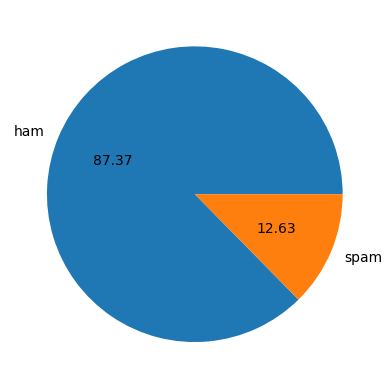

In [18]:
# for better representation, below graphical view
import matplotlib.pyplot as plt 
plt.pie(spam_df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [19]:
# Important note: Data is imbalance

In [20]:
# checking how many letters, words and sentence in target column

In [21]:
# Importing Natural Language Toolkit
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arbaz
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Arbaz
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
spam_df.loc[:, 'num_characters'] = spam_df['text'].apply(len)

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_60440\2996179501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df.loc[:, 'num_characters'] = spam_df['text'].apply(len)


In [25]:
spam_df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
spam_df.loc[:, 'num_words'] = spam_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_60440\802852067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df.loc[:, 'num_words'] = spam_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [27]:
spam_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# num of sentence
spam_df.loc[:, 'num_sentence'] = spam_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_60440\2752276525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df.loc[:, 'num_sentence'] = spam_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [29]:
spam_df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
# Analysis the newly added columns
spam_df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# Analysis ham and spam seperatly
# for ham
spam_df[spam_df['target']==0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# for spam
spam_df[spam_df['target']==1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

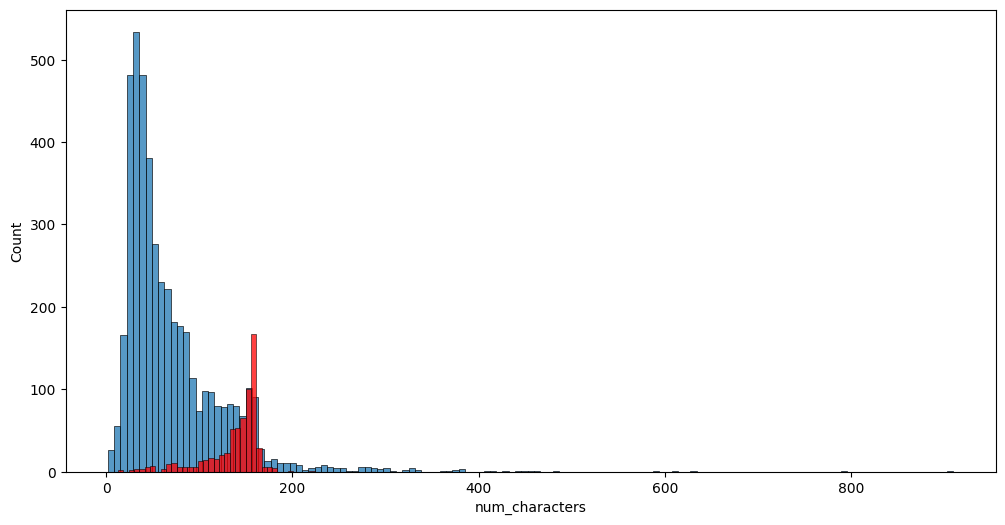

In [43]:
# Analysis through graph
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['target']==0]['num_characters'])
sns.histplot(spam_df[spam_df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

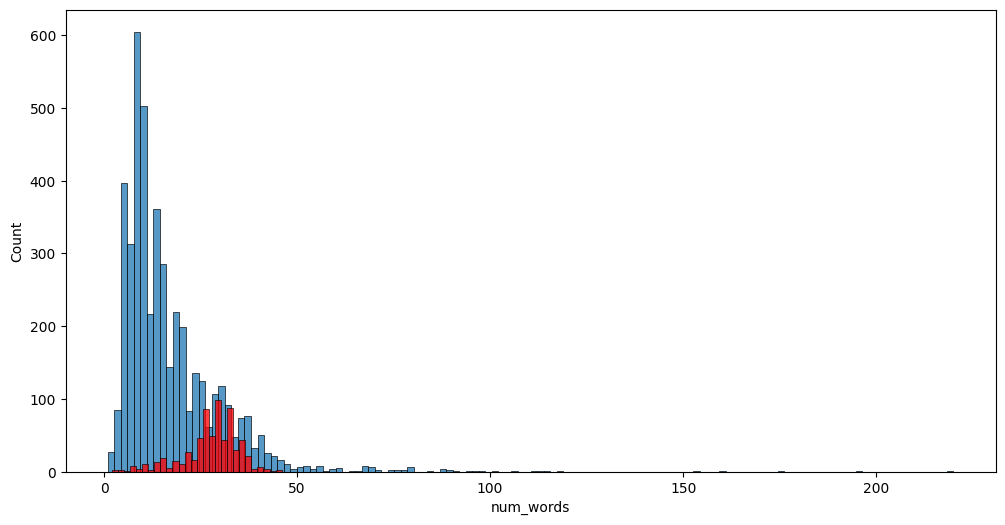

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['target']==0]['num_words'])
sns.histplot(spam_df[spam_df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

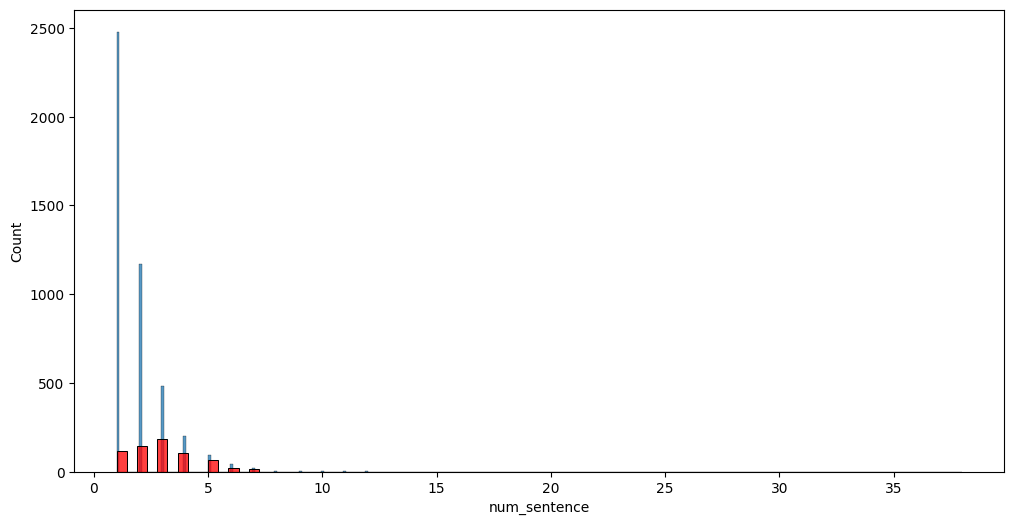

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(spam_df[spam_df['target']==0]['num_sentence'])
sns.histplot(spam_df[spam_df['target']==1]['num_sentence'], color='red')

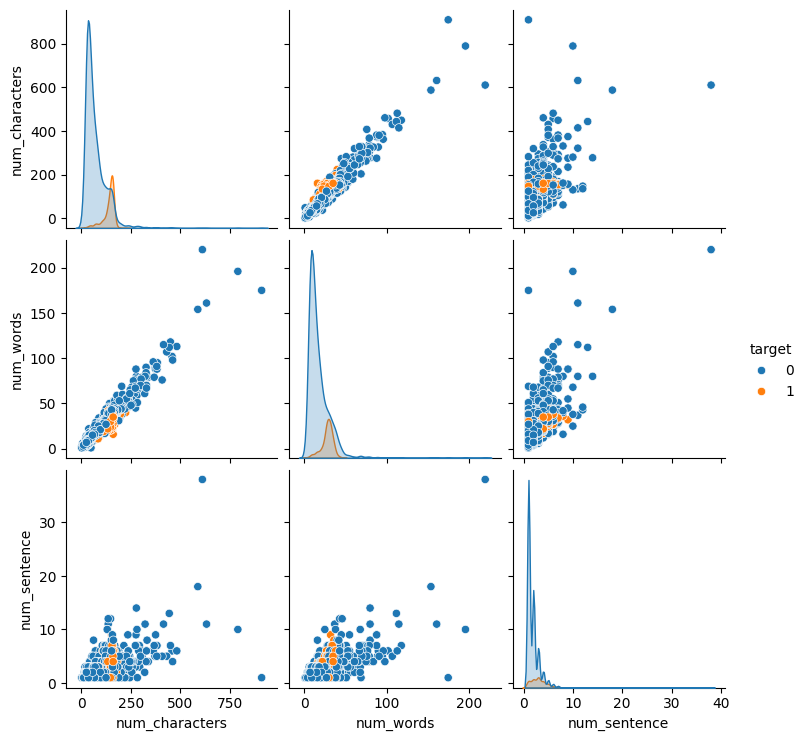

In [46]:
sns.pairplot(spam_df, hue = 'target')

In [49]:
spam_df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
spam_df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

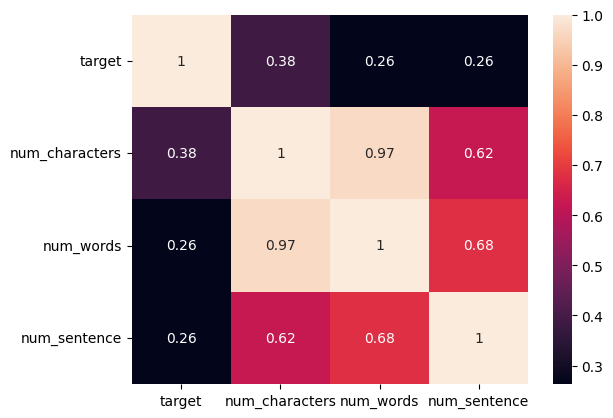

In [52]:
sns.heatmap(spam_df[['target', 'num_characters', 'num_words', 'num_sentence']].corr(), annot = True)

In [57]:
# from above analysis we came to know about below two points:
# 1. we can inference that the spam sms are larger than ham sms.
# 2. There is a multicolliearity between newly added columns. So, we need to take only 1 column out of 3.
# We will proceed with num_characters column here and removing other two.

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* stemming

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Arbaz
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
#  Creating function to preprocess

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    
    # Lower case
    text = text.lower()
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [66]:
spam_df['transform_text'] = spam_df['text'].apply(transform_text)

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_60440\3363973019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['transform_text'] = spam_df['text'].apply(transform_text)


In [67]:
spam_df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
# Using wordcloud to see words with higher occurence
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [81]:
spam_wc = wc.generate(spam_df[spam_df['target'] == 1]['transform_text'].str.cat(sep=" "))

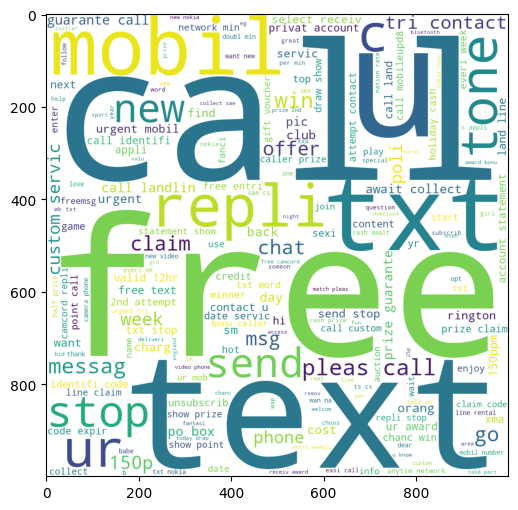

In [84]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

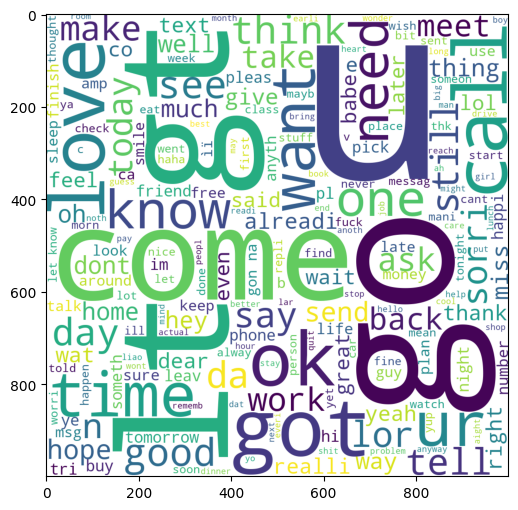

In [85]:
ham_wc = wc.generate(spam_df[spam_df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [86]:
spam_df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [97]:
#  Finding top 30 spam words
spam_corpus = []
for msg in spam_df[spam_df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [100]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

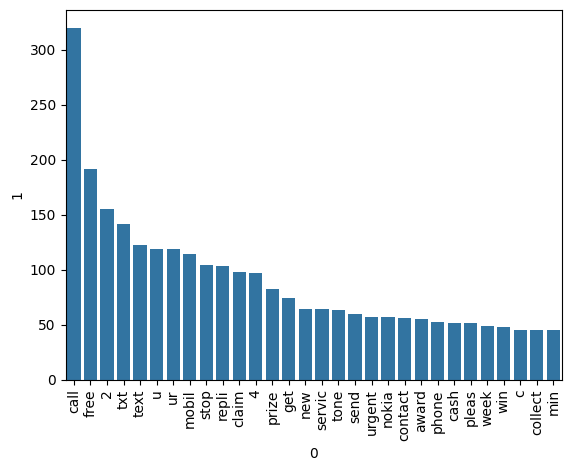

In [104]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [107]:
#  Finding top 30 ham words
ham_corpus = []
for msg in spam_df[spam_df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

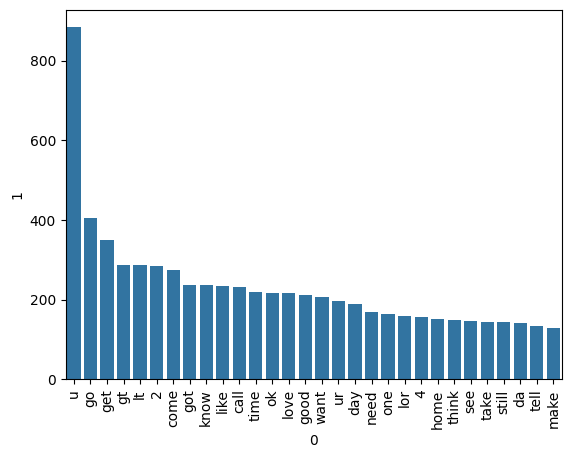

In [108]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [194]:
spam_df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [195]:
# Generally Naive bayes model performs well when dealing with textual data.

# Here we have 'transform_text' as input column and 'target' as output column.
# we will need to transform input in numerical i.e to vectorised

In [196]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [197]:
X = cv.fit_transform(spam_df['transform_text']).toarray()

In [198]:
y = spam_df['target'].values

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [201]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [202]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [203]:
# For CountVectorizer - GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [204]:
# For CountVectorizer - MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [205]:
# For CountVectorizer - BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [206]:
X = tfidf.fit_transform(spam_df['transform_text']).toarray()

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [208]:
# For TfidfVectorizer - GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [209]:
# For TfidfVectorizer - MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [210]:
# For TfidfVectorizer - BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [211]:
# As the data is imbalance, precision score matters a lot
# TfidfVectorizer - MultinomialNB' precision score is best such that it is not making a single mistake for predicting.

In [212]:
# double checking our model with all other models and comparing

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [214]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [215]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [216]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [217]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [218]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [219]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [220]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [221]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [222]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.972921
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


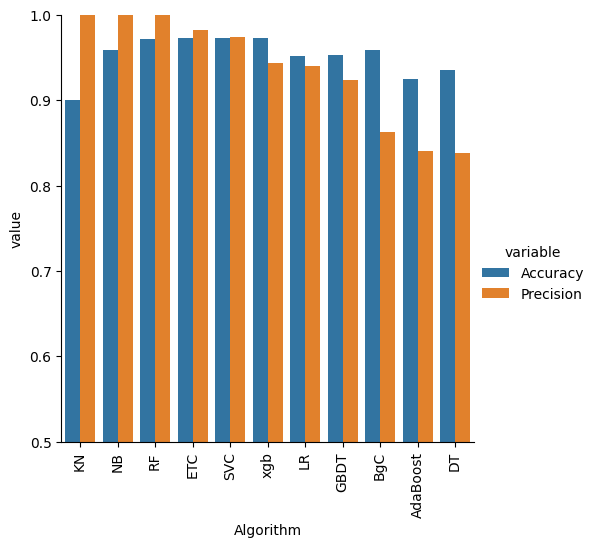

In [223]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [224]:
# After our comparison, RandomForestClassifier is performing best in in term of both accuracy and precision. 
# however KNeighborsClassifier and MultinomialNB is also performing well, so we will vote for it.

In [225]:
# Voting Classifier
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [226]:
voting = VotingClassifier(estimators=[('knc', knc), ('mnb', mnb), ('rfc', rfc)],voting='soft')

In [227]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('knc', KNeighborsClassifier()),
                             ('mnb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [228]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9410058027079303
Precision 1.0


In [229]:
# Applying stacking
estimators=[('knc', knc), ('mnb', mnb), ('rfc', rfc)]
final_estimator=RandomForestClassifier()

In [230]:
from sklearn.ensemble import StackingClassifier

In [231]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [232]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9051094890510949


In [233]:
# We have used some techniques like stacking and voting but it seems Accuracy and Precision are not improving
#########################
# So finally we will go with -----------  RandomForestClassifier (Accuracy -  0.971953578336557, Precision -  1.0)
#########################

In [241]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

## Adding required objects into pickle

In [234]:
import pickle

In [242]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))